<a href="https://colab.research.google.com/github/Hasibul-Islam/torchlearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Transform images to 4 dimensional tensor (# of images, height, width, color channel)

transform = transforms.ToTensor()

In [3]:
# import MNIST dataset

train_data = datasets.MNIST(root='/mnist_train', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='/mnist_test', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 34.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.97MB/s]
100%|██████████| 9.91M/9.91M [00:00<00:00, 34.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.03MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.38MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.31MB/s]


In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /mnist_train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /mnist_test
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
# define batch size

train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=False)

In [7]:
# Describe CNN
# No code just having basic idea of convolution
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)



In [8]:
# looking at a single mnist image

for x , (X_train, y_train) in enumerate(train_data):

    break

In [9]:
X_train.shape

torch.Size([1, 28, 28])

In [10]:
x = X_train.view(1,1,28,28)

In [11]:
# perform first convolution

x = F.relu(conv1(x))
x.shape
# 1 single image(batch), 6 filter asked, height, width, height width remained same as I kept padding = 1, if no padding it would have downed to 26*26

torch.Size([1, 6, 28, 28])

In [12]:
# perform second convolution

x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 28, 28])

In [13]:
# lets do pooling

x = F.max_pool2d(x, 2, 2)
x.shape

# 28/2 = 14

torch.Size([1, 16, 14, 14])

In [14]:
# lets do another pooling

x = F.max_pool2d(x, 2, 2)
x.shape

# 14/2 = 7

torch.Size([1, 16, 7, 7])

In [15]:
# lets do another pooling

x = F.max_pool2d(x, 2, 2)
x.shape

# 7/2 = 3.5 but we can not generate data of missing 0.5 portion hence taken 3

torch.Size([1, 16, 3, 3])

In [16]:
# But the conventional way is
x = X_train.view(1,1,28,28)
x = F.relu(conv1(x)) # Same size but different input features as I defined 6
x = F.max_pool2d(x, 2, 2) # Converted to half but keeping the same input features as the pooling is 2 pixel with stide 2
x = F.relu(conv2(x)) # then again kept the same size which is 14*14 but different input fetures which is 16
x = F.max_pool2d(x, 2, 2) # then this one has again pulled it into half but kept same input features
x.shape


torch.Size([1, 16, 7, 7])

In [28]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self, *args, **kwargs):
     super().__init__(*args, **kwargs)
     #convolutional layers
     self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1) # the out channels number is random
     self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1) # the out channel of first conv2d is the input of the 2nd conv2d
     # fully connected layers
     self.fc1 = nn.Linear(in_features=7*7*16, out_features=120) # torch.Size([1, 16, 7, 7]) this was the final torch size so the height * width * output --> 7*7*16 and out_features 120 is random
     self.fc2 = nn.Linear(in_features=120, out_features=84)
     self.fc3 = nn.Linear(in_features=84, out_features=10)
  def forward(self, X):
    # first pass
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    # second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    # flatten layer
    X = X.view(-1, 7*7*16) # negative 1 so that I can change the batch size anytime

    # fully connected layers

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


In [42]:
# create an instance of the Model
torch.manual_seed(101)
model = ConvolutionalNetwork()

In [43]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
# loss function
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [45]:
#training and testing
import time
start_time = time.time()
epochs = 3
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b, (X_train, y_train) in enumerate(train_dataloader):
    b+=1 # start batch at 1
    #apply model
    y_pred = model(X_train) # get predicted 2d values from train, not flatten
    loss = loss_function(y_pred, y_train)
    #
    predicted = torch.max(y_pred.data, 1)[1] # get the index of the max#
    batch_correct = (predicted == y_train).sum() # check how many got correct in this batch
    trn_corr += batch_correct # keep track as we go
    #
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print out result
    if b%600 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}  \accuracy: {trn_corr.item()*100/(10*b)}%')
  train_losses.append(loss)
  train_correct.append(trn_corr)




# test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_dataloader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()
      loss = loss_function(y_val, y_test)

    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()

total_time = current_time - start_time
print('The training took '+str(total_time/60)+' minutes!')

epoch: 0  batch: 600  loss: 0.13631558418273926  ccuracy: 72.13333333333334%
epoch: 0  batch: 1200  loss: 0.11244417726993561  ccuracy: 81.79166666666667%
epoch: 0  batch: 1800  loss: 0.004448622930794954  ccuracy: 85.86111111111111%
epoch: 0  batch: 2400  loss: 0.046665988862514496  ccuracy: 88.35%
epoch: 0  batch: 3000  loss: 0.06133083626627922  ccuracy: 89.77%
epoch: 0  batch: 3600  loss: 0.23886308073997498  ccuracy: 90.87222222222222%
epoch: 0  batch: 4200  loss: 0.4747239649295807  ccuracy: 91.72619047619048%
epoch: 0  batch: 4800  loss: 0.0816420242190361  ccuracy: 92.39583333333333%
epoch: 0  batch: 5400  loss: 0.0867699682712555  ccuracy: 92.94444444444444%
epoch: 0  batch: 6000  loss: 0.00843704305589199  ccuracy: 93.36333333333333%
epoch: 1  batch: 600  loss: 0.002274732105433941  ccuracy: 97.9%
epoch: 1  batch: 1200  loss: 0.02597186528146267  ccuracy: 97.91666666666667%
epoch: 1  batch: 1800  loss: 0.004165345802903175  ccuracy: 98.0%
epoch: 1  batch: 2400  l

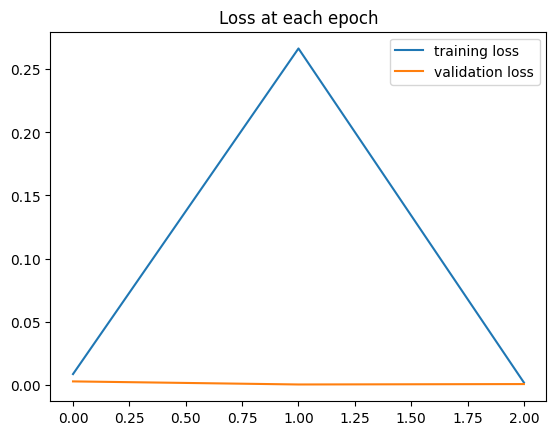

In [57]:
# graph the loss at each epoch
#train_losses = list(map(lambda x: x.item(), train_losses))
#test_losses = list(map(lambda x: x.item(), test_losses))
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at each epoch')
plt.legend()

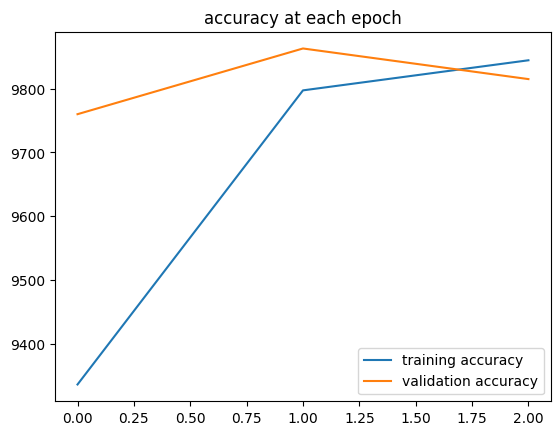

In [56]:
# graph the accuracy at each epoch
plt.plot([t.item()*100/600 for t in train_correct], label='training accuracy')
plt.plot([t.item()*100/100 for t in test_correct], label='validation accuracy')
plt.title('accuracy at each epoch')
plt.legend()

In [58]:
# test with test data
test_dataloader_all = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_dataloader_all:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()
  print(f'Test accuracy: {correct.item()*100/len(test_data)}%')

Test accuracy: 98.15%


In [59]:
correct

tensor(9815)

In [70]:
# test with an image
test_image = test_data[450]
test_image

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [71]:
with torch.no_grad():
  y_val = model(test_image[0].view(1,1,28,28)) # batch size 1, color channel 1, height, width
  predicted = torch.max(y_val.data, 1)[1]
predicted

test_image = test_data[450][0]
test_image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [72]:
test_image = test_image.reshape(28,28)
test_image

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

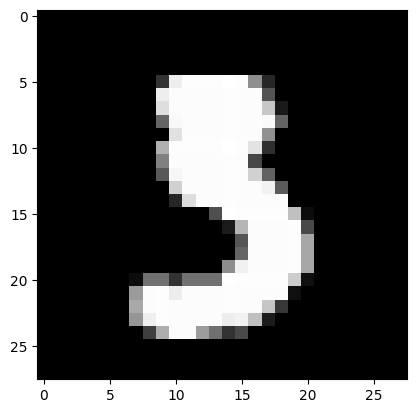

In [73]:
plt.imshow(test_image, cmap='gray')